In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns


In [2]:
a=[[1,2,3],
   [4,5,6],
   [7,8,9]]
a
a[0:2]

b=np.array(a)
print(b)
print(b[0:2,1])

c=pd.DataFrame(a,columns=["a","b","c"])
print(c)
print(c.iloc[0:2,1])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[2 5]
   a  b  c
0  1  2  3
1  4  5  6
2  7  8  9
0    2
1    5
Name: b, dtype: int64


In [3]:
data=pd.read_csv("housing_prices.csv")
data

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city,country
0,3.130000e+05,3.0,1.50,1340.0,1.5,0.0,0.0,1340.0,0.0,Shoreline,USA
1,2.384000e+06,5.0,2.50,3650.0,2.0,0.0,4.0,3370.0,280.0,Seattle,USA
2,3.420000e+05,3.0,2.00,1930.0,1.0,0.0,0.0,1930.0,0.0,Kent,USA
3,4.200000e+05,3.0,2.25,2000.0,1.0,0.0,0.0,1000.0,1000.0,Bellevue,USA
4,5.500000e+05,4.0,2.50,1940.0,1.0,0.0,0.0,1140.0,800.0,Redmond,USA
...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510.0,1.0,0.0,0.0,1510.0,0.0,Seattle,USA
4596,5.343333e+05,3.0,2.50,1460.0,2.0,0.0,0.0,1460.0,0.0,Bellevue,USA
4597,4.169042e+05,3.0,2.50,3010.0,2.0,0.0,0.0,3010.0,0.0,Renton,USA
4598,2.034000e+05,4.0,2.00,2090.0,1.0,0.0,0.0,1070.0,1020.0,Seattle,USA


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4599 non-null   float64
 1   bedrooms       4599 non-null   float64
 2   bathrooms      4594 non-null   float64
 3   sqft_living    4566 non-null   float64
 4   floors         4589 non-null   float64
 5   waterfront     4587 non-null   float64
 6   view           4594 non-null   float64
 7   sqft_above     4593 non-null   float64
 8   sqft_basement  4598 non-null   float64
 9   city           4600 non-null   object 
 10  country        4600 non-null   object 
dtypes: float64(9), object(2)
memory usage: 395.4+ KB


In [5]:
data.isnull().sum()

price             1
bedrooms          1
bathrooms         6
sqft_living      34
floors           11
waterfront       13
view              6
sqft_above        7
sqft_basement     2
city              0
country           0
dtype: int64

In [6]:
data["sqft_living"].fillna(np.mean(data["sqft_living"]),inplace=True)
data.isnull().sum()

price             1
bedrooms          1
bathrooms         6
sqft_living       0
floors           11
waterfront       13
view              6
sqft_above        7
sqft_basement     2
city              0
country           0
dtype: int64

In [7]:
data=data.dropna()
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
sqft_above       0
sqft_basement    0
city             0
country          0
dtype: int64

In [8]:
# data.info()
X=data.drop(["price"],axis=1)
X=pd.get_dummies(X,columns=["city","country"])
#help(pd.get_dummies)
y=data["price"]

In [9]:
linear_model=LinearRegression()
linear_model.fit(X,y)
linear_model.score(X,y)

0.2624931322818026

(array([ 56., 108., 515., 732., 719., 610., 536., 338., 259., 201., 114.,
         76.,  52.,  45.,  35.,  33.,  11.,  15.,  15.,  16.,   7.,   8.,
          8.,   5.,   5.,   6.,   4.,   8.,   2.,   0.,   3.,   1.,   1.,
          1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0., 

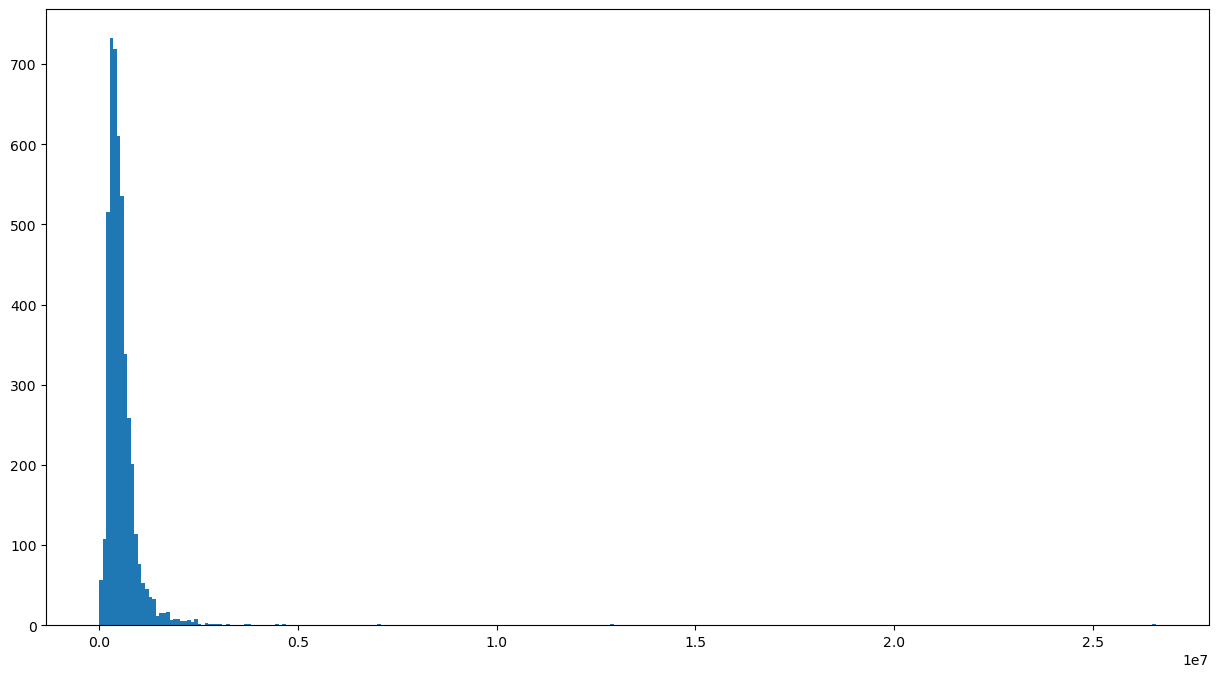

In [10]:
plt.figure(figsize=(15,8))
plt.hist(data["price"],bins=300,)

# help(plt.hist)

<Axes: xlabel='price', ylabel='Count'>

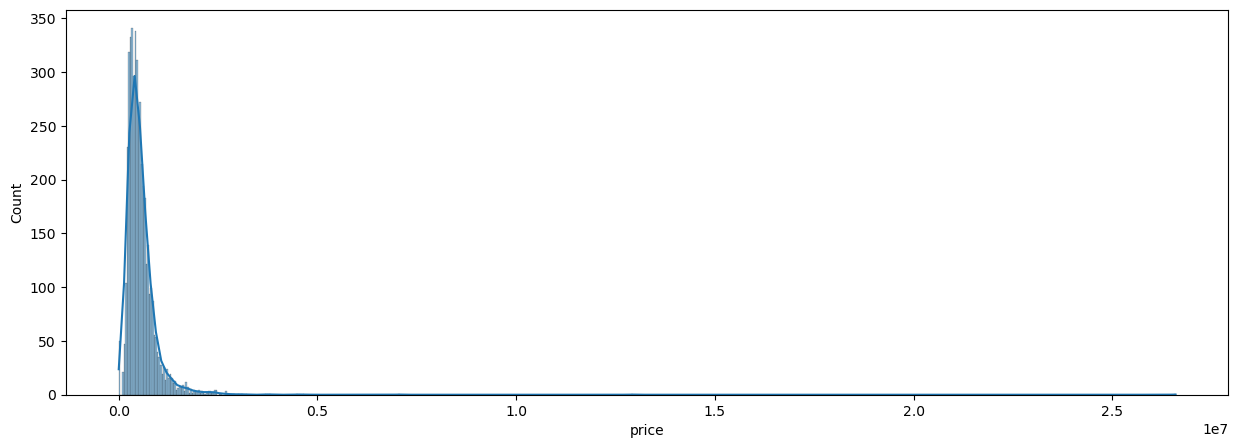

In [11]:
plt.figure(figsize=(15,5))
sns.histplot(data["price"],kde=True)

In [12]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement
count,4.554000e+03,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000
mean,5.527701e+05,3.402723,2.162934,2141.938922,1.513395,0.007246,0.239789,1829.556653,312.464866
std,5.660575e+05,0.909646,0.784553,963.232210,0.537458,0.084826,0.778041,864.090756,464.583498
min,0.000000e+00,0.000000,0.000000,370.000000,1.000000,0.000000,0.000000,370.000000,0.000000
25%,3.238750e+05,3.000000,1.750000,1470.000000,1.000000,0.000000,0.000000,1190.000000,0.000000
50%,4.620000e+05,3.000000,2.250000,1980.000000,1.500000,0.000000,0.000000,1590.000000,0.000000
75%,6.550000e+05,4.000000,2.500000,2617.500000,2.000000,0.000000,0.000000,2302.250000,610.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,9410.000000,4820.000000


<Axes: xlabel='price', ylabel='Count'>

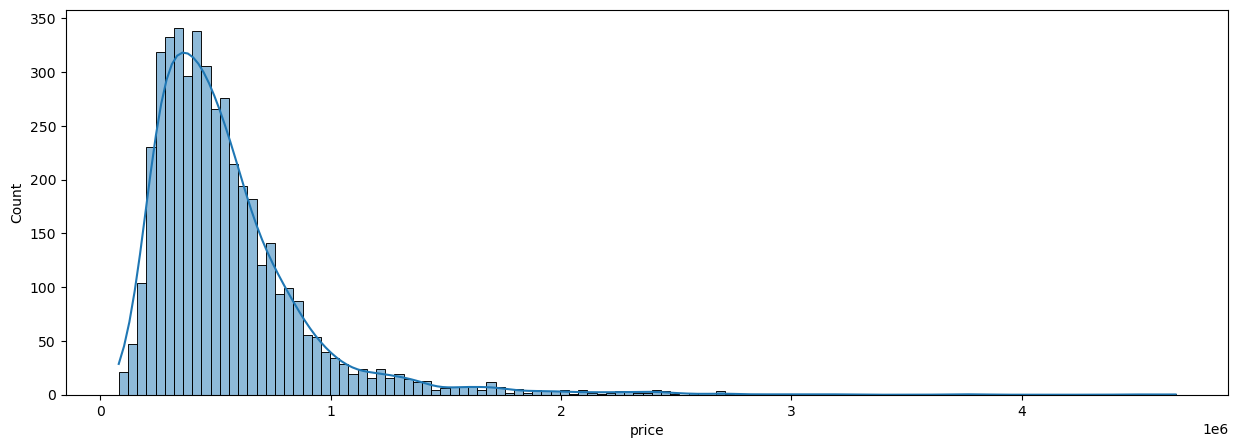

In [13]:
data=data[data["price"]<.5*1e7]
data=data[data["price"]>40000]
plt.figure(figsize=(15,5))
sns.histplot(data["price"],kde=True)

In [14]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement
count,4.501000e+03,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000
mean,5.489349e+05,3.396579,2.156798,2133.665819,1.513775,0.006443,0.233504,1823.621640,310.127749
std,3.561518e+05,0.905184,0.776427,948.733835,0.537721,0.080018,0.764720,852.063147,461.543285
min,8.000000e+04,0.000000,0.000000,370.000000,1.000000,0.000000,0.000000,370.000000,0.000000
25%,3.265000e+05,3.000000,1.750000,1470.000000,1.000000,0.000000,0.000000,1190.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1980.000000,1.500000,0.000000,0.000000,1590.000000,0.000000
75%,6.580000e+05,4.000000,2.500000,2610.000000,2.000000,0.000000,0.000000,2300.000000,600.000000
max,4.668000e+06,9.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,9410.000000,4820.000000


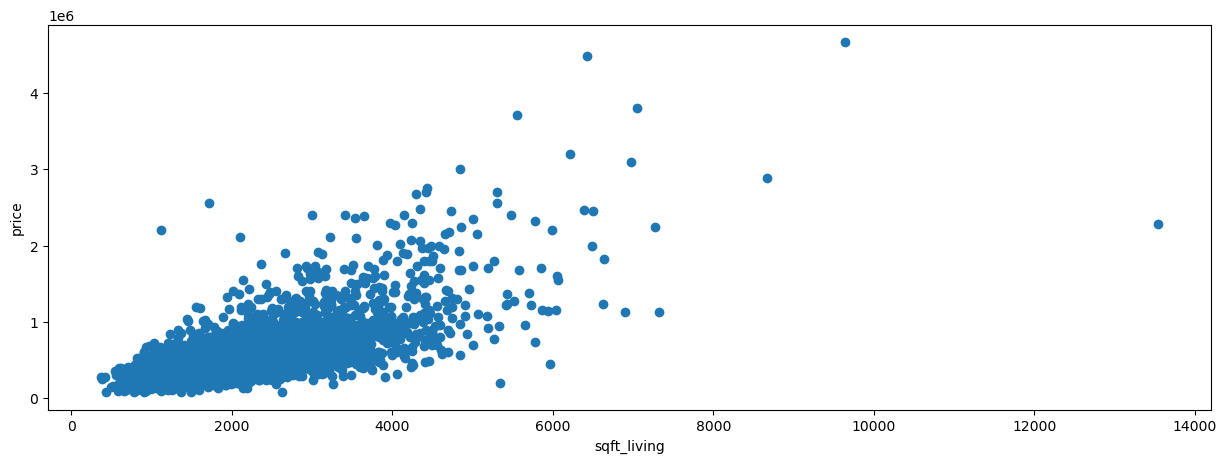

In [15]:
plt.figure(figsize=(15,5))
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.scatter(data["sqft_living"],data["price"])

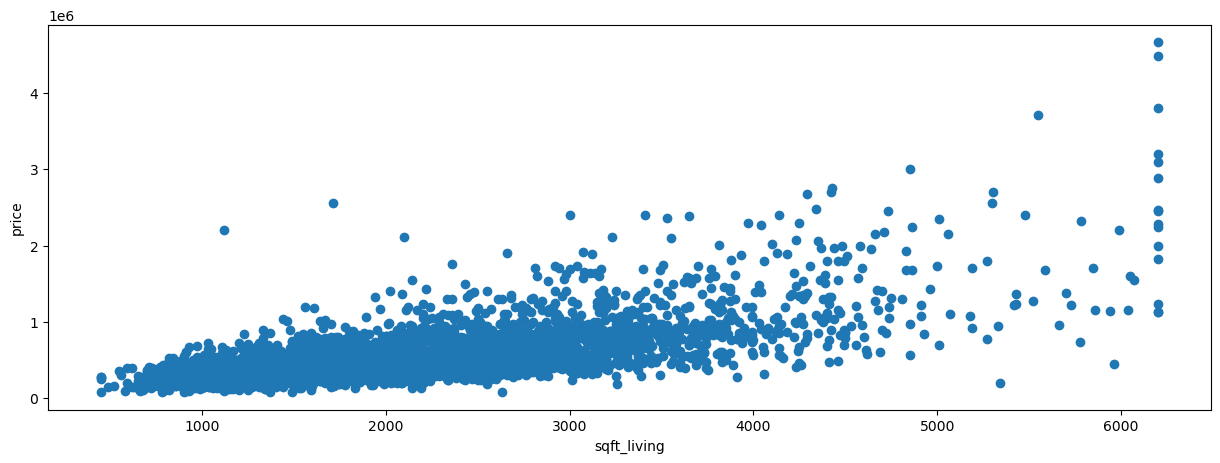

In [16]:
data["sqft_living"]=np.where(data["sqft_living"]<6200 ,data["sqft_living"],6200)
data["sqft_living"]=np.where(data["sqft_living"]>450 ,data["sqft_living"],450)
plt.figure(figsize=(15,5))
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.scatter(data["sqft_living"],data["price"])

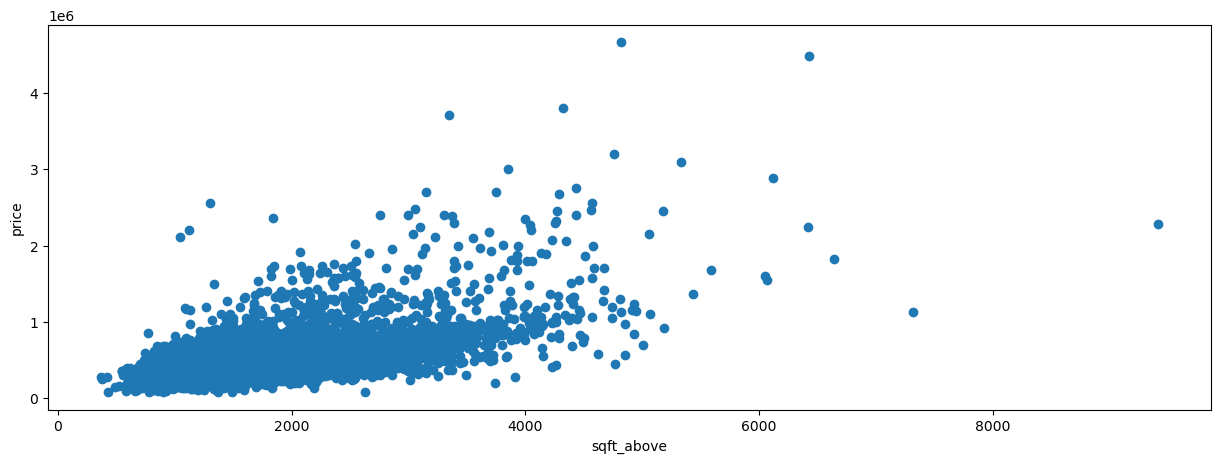

In [17]:
plt.figure(figsize=(15,5))
plt.xlabel("sqft_above")
plt.ylabel("price")
plt.scatter(data["sqft_above"],data["price"])

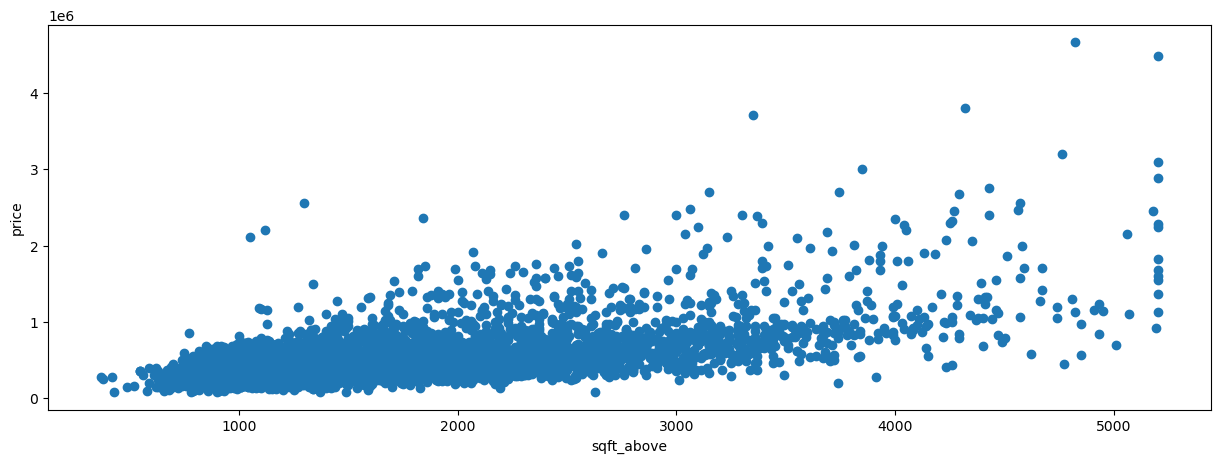

In [18]:
data["sqft_above"]=np.where(data["sqft_above"]<5200,data["sqft_above"],5200)
plt.figure(figsize=(15,5))
plt.xlabel("sqft_above")
plt.ylabel("price")
plt.scatter(data["sqft_above"],data["price"])

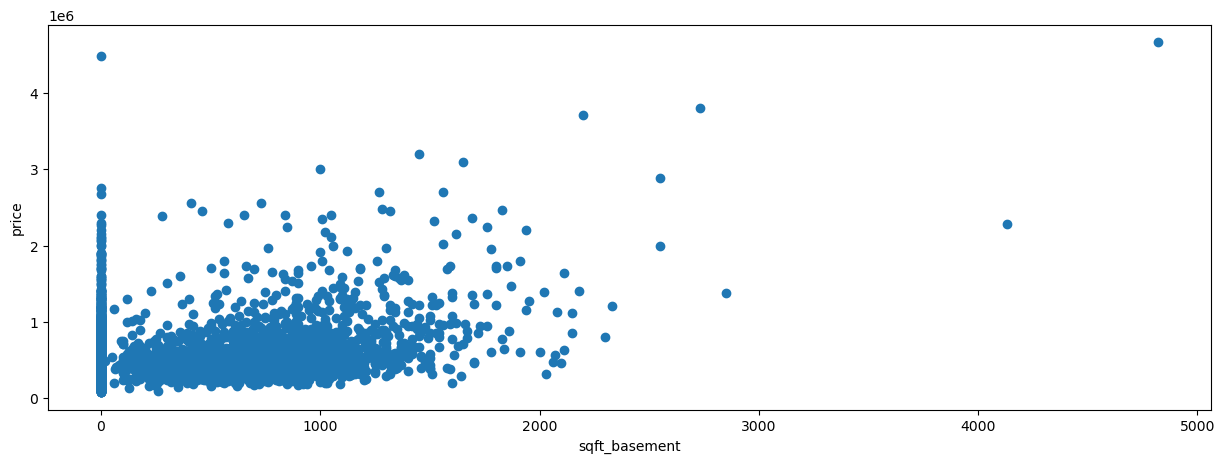

In [19]:
plt.figure(figsize=(15,5))
plt.xlabel("sqft_basement")
plt.ylabel("price")
plt.scatter(data["sqft_basement"],data["price"])

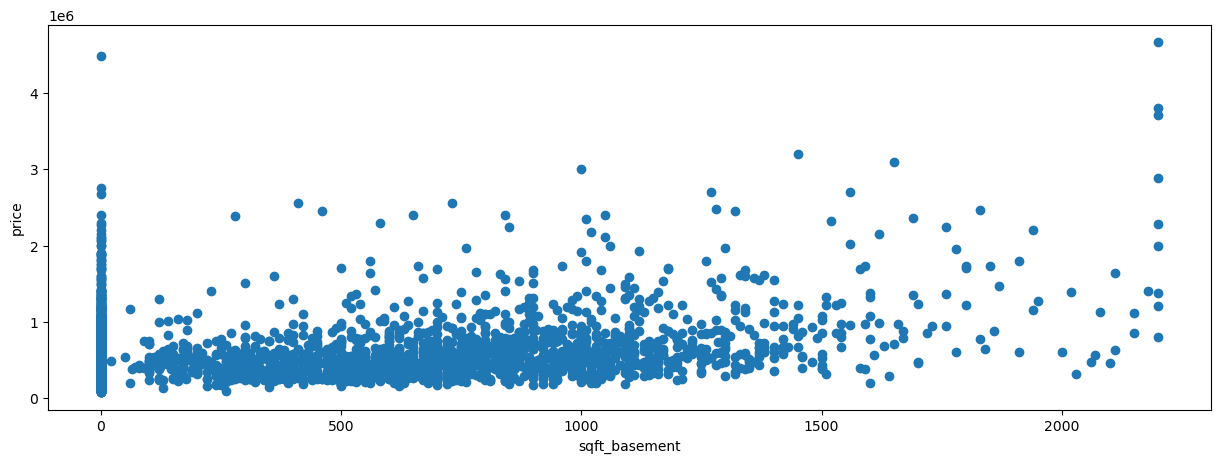

In [20]:
data["sqft_basement"]=np.where(data["sqft_basement"]<2200,data["sqft_basement"],2200)
plt.figure(figsize=(15,5))
plt.xlabel("sqft_basement")
plt.ylabel("price")
plt.scatter(data["sqft_basement"],data["price"])

bedrooms
0.0       2
1.0      37
2.0     552
3.0    2000
4.0    1500
5.0     334
6.0      59
7.0      14
8.0       2
9.0       1
Name: count, dtype: int64

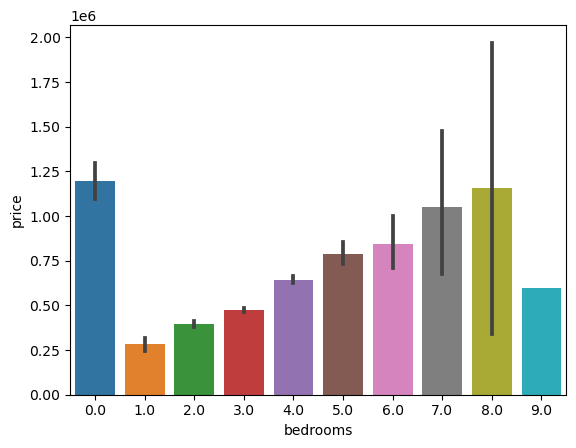

In [21]:

sns.barplot(x=data["bedrooms"],y=data["price"])
data["bedrooms"].value_counts().sort_index()


<Axes: xlabel='bedrooms', ylabel='price'>

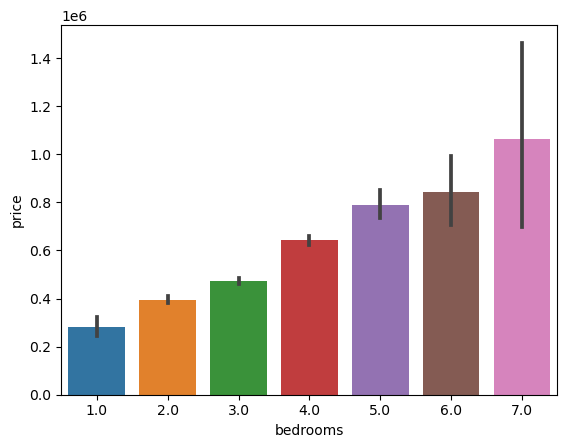

In [22]:
data=data[data["bedrooms"]!=0]
data=data[data["bedrooms"]!=9]
data["bedrooms"]=np.where(data["bedrooms"]>7,7,data["bedrooms"])
sns.barplot(x=data["bedrooms"],y=data["price"])


bathrooms
0.75      17
1.00     725
1.25       3
1.50     283
1.75     619
2.00     422
2.25     407
2.50    1173
2.75     269
3.00     162
3.25     134
3.50     158
3.75      34
4.00      21
4.25      22
4.50      24
4.75       7
5.00       5
5.25       4
5.50       4
5.75       1
6.25       1
6.50       1
6.75       1
8.00       1
Name: count, dtype: int64

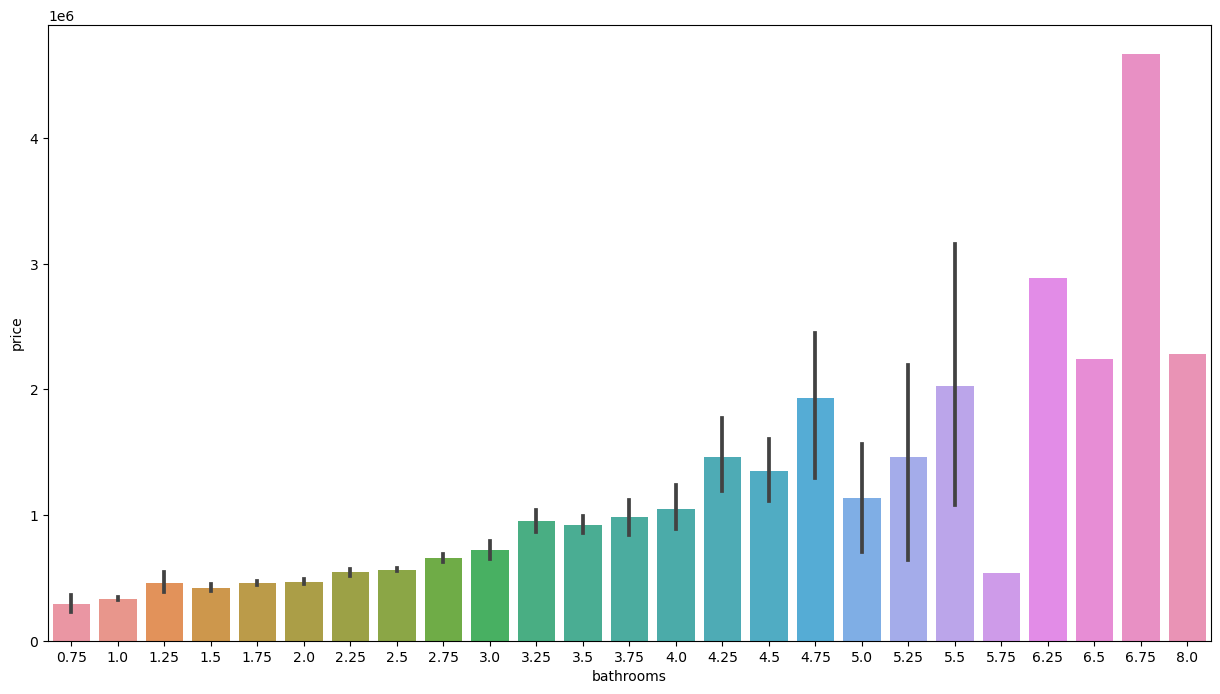

In [23]:
#plt.scatter(data["bathrooms"],data["price"])


plt.figure(figsize=(15,8))
sns.barplot(x=data["bathrooms"],y=data["price"])
data["bathrooms"].value_counts().sort_index()

<Axes: xlabel='bathrooms', ylabel='price'>

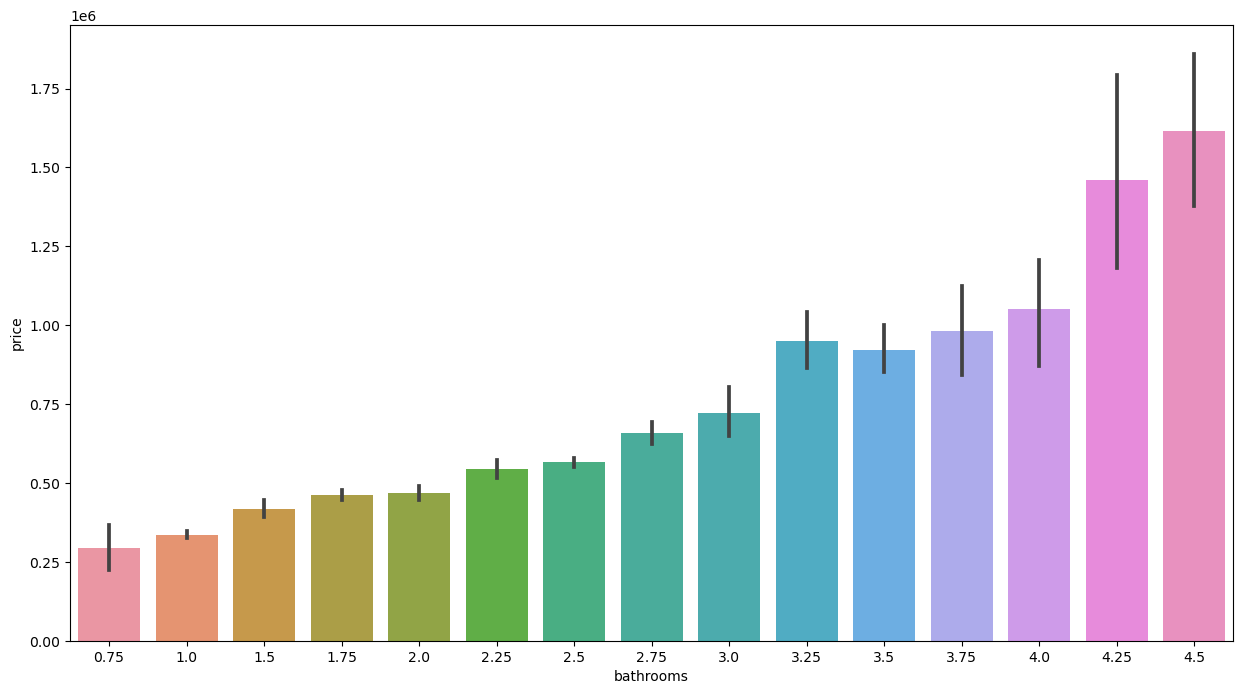

In [24]:
data=data[data["bathrooms"]!=5.75]
data["bathrooms"]=np.where(data["bathrooms"]<4.5,data["bathrooms"],4.5)
data["bathrooms"]=np.where(data["bathrooms"]==1.25,1.5,data["bathrooms"])
plt.figure(figsize=(15,8))
sns.barplot(x=data["bathrooms"],y=data["price"])

In [25]:
data["floors"].value_counts().sort_index()

floors
1.0    2117
1.5     438
2.0    1777
2.5      40
3.0     124
3.5       1
Name: count, dtype: int64

<Axes: xlabel='floors', ylabel='price'>

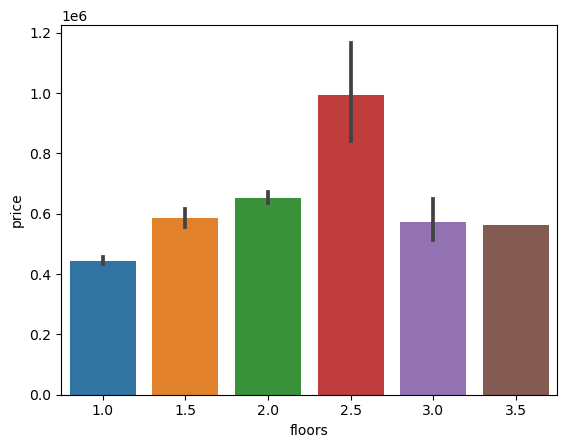

In [26]:
sns.barplot(x=data["floors"],y=data["price"])

<Axes: xlabel='floors', ylabel='price'>

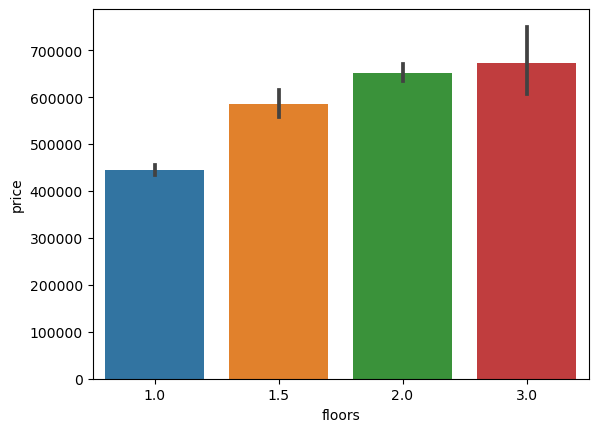

In [27]:
data["floors"]=np.where(data["floors"]>2,3,data["floors"])
sns.barplot(x=data["floors"],y=data["price"])

view
0.0    4059
1.0      67
2.0     195
3.0     113
4.0      63
Name: count, dtype: int64

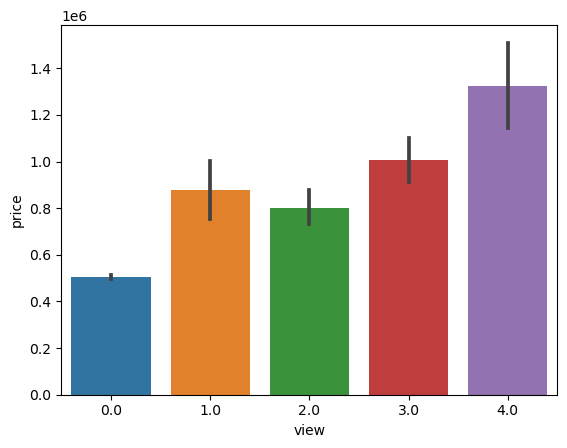

In [28]:
sns.barplot(x=data["view"],y=data["price"])
data["view"].value_counts().sort_index()

In [29]:
data.describe(include=object)

,city,country
count,4497,4497
unique,44,1
top,Seattle,USA
freq,1540,4497


In [30]:
X=data.drop(["price"],axis=1)
X=pd.get_dummies(data=X,columns=["city","country"])
y=data["price"]

model=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=45)
print(X_train.shape)
print(X_test.shape)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))


(3597, 53)
(900, 53)
0.705121262469864
0.6349808470822679


In [31]:
# poly=PolynomialFeatures(2)
# X_poly=poly.fit_transform(X)
# X_train,X_test,y_train,y_test=train_test_split(X_poly,y,test_size=.2,random_state=45)
# print(X_train.shape)
# print(X_test.shape)
# model.fit(X_train,y_train)
# print(model.score(X_train,y_train))
# y_t_predicted=model.predict(X_test)
# cost=sum((y_test-y_t_predicted)**2)
# print (cost)

# plt.scatter(y_test,y_t_predicted)

    